In [2]:
def new_cub_ball(n,a,b,c):
    A = [[0]* 3 for i in range(n*n*n)]
    p = 0
    for k in range(n):
        for j in range(n):
            for i in range(n):
                A[p] = [i+a,j+b,k+c]
                p = p + 1
    return A

In [55]:
def read_file(link):
    mass = []
    with open(link, "r") as file1:
        lines = file1.readlines()
    for line in lines:
        mass.append(line.strip())
        #print(line.strip())
    t = len(mass)
    palik_ev = []
    palik_n = []
    palik_k = []
    array2 = [0] * t 
    for i in range(t):
        array2[i]= mass[i].split(' ')
    for i in range(len(array2)):
        array2[i]= list(map(float, array2[i]))
        palik_ev.append(array2[i][0])
        palik_n.append(array2[i][1])
        palik_k.append(array2[i][2])
        #array2[i] = [array2[i][0], array2[i][1], array2[i][2]]
    file1.close
    return palik_ev, palik_n, palik_k
    
"""
0.14134176 0.07813886655222717 *
0.14010192 0.14330112976740803
0.13886208 0.24062333800294963 *
0.13762224 0.060667193285121955

#
0.061992 0.05075047181008811 *
0.06075216 0.14637776015425122 *
0.05951232 0.17526950678577655 
0.0588924 0.07437981015384644 *
"""
link_palik = "D:\\Heat_transfer\\1-s2.0-S0022407318309270-mmc1\\mmc1_palik\\palik_spectrum_eV_n_k.txt"
palik_ev, palik_n, palik_k = read_file(link_palik)
w_5 = [0.14134176,0.13886208,0.061992,0.06075216,0.0588924]
n_5 = [0.3915,0.3705,0.6616,0.5777,1.002]
k_5 = [1.32,1.85,0.822,1.28,2.22]
#for i in range(len(palik_ev)):
    #print(palik_ev[i],palik_n[i], palik_k[i])


In [4]:
def right_in_file_shape(path):
    with open(path,"r") as ins:
        array1 = []
        for line in ins:
            array1.append(line)
    t = len(array1)-4
    array2 = [0] * t 
    for i in range(t):
        array2[i]= array1[i+4].split(' ')
    for i in range(len(array2)):
        array2[i]= list(map(float, array2[i]))
        array2[i] = [array2[i][0], array2[i][1], array2[i][2]]
    return array2

def shape_2spheres(array1, path1,d,grid):
    with open(path1, "a") as file:
        for res in array1:
            file.write(str(int(res[0]))+" "+str(int(res[1]))+" "+str(int(res[2])) + '\n')
        for res in array1:
            file.write(str(int(res[0]))+" "+str(int(res[1]))+" "+str(int(res[2]+d+grid)) + '\n')
#         for res in array1:
#             file.write(str(int(res[0]))+" "+str(int(res[1]))+" "+str(int(res[2]+d)) + '\n')


In [56]:
import os, shutil, re, csv, time, multiprocessing, math
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib
import pylab
import math 
start_time = time.time()
#Particles parameters
n = 9 # is the size of cubes along one axis in units of dipoles
size = 0.5#0.5#0.001 #Sets the size of the computational grid along the 𝑥𝑥-axis in µm (§6.2), float
p = size/n #Dipole size(cubical) in microns# number of dipoles between particles (cubes)
gap_d = 0.5/p

#gap_d = round((10**-6)/p, 1)
# a = 0.04
# b = 0.16
# c = 0.006#0.012
# x_1, real_eps, imag_eps = eps(a,b,c)
# re_m = [0]*len(x_1)
# im_m = [0]*len(x_1)
# for k in range(len(x_1)): 
#     re_m[k] = math.sqrt((math.sqrt(real_eps[k]**2+imag_eps[k]**2) + real_eps[k])*0.5)
#     im_m[k] = math.sqrt((math.sqrt(real_eps[k]**2+imag_eps[k]**2) - real_eps[k])*0.5)
re_m = n_5#[2.038] 
im_m =k_5#[0.046] 
x_1 = w_5#[0.1146852] 
#0.1146852 eV 0.1146852 2.038 0.046
# re_m = palik_n[2::2]
# im_m = palik_k[2::2]
# x_1 = palik_ev[2::2]

# palik_ev_mass_30 = palik_ev[2::2]
# palik_n_mass_30 = palik_n[2::2]
# palik_k_mass_30 = palik_k[2::2]
# x_1 = palik_ev_mass_20
# re_m = [0]*len(palik_ev_mass_20) # real part of the refractive index
# im_m = [0]*len(palik_ev_mass_20) # imaginary part of the refractive index
# for k in range(len(palik_ev_mass_20)): 
#     re_m[k] = palik_n_mass_20[k]
#     im_m[k] = palik_k_mass_20[k]
# a = 0.04
# b = 0.16
# c = 0.006#0.012
# x_1, real_eps, imag_eps = eps(a,b,c)
# re_m = [0]*len(x_1)
# im_m = [0]*len(x_1)
# for k in range(len(x_1)): 
#     re_m[k] = math.sqrt((math.sqrt(real_eps[k]**2+imag_eps[k]**2) + real_eps[k])*0.5)
#     im_m[k] = math.sqrt((math.sqrt(real_eps[k]**2+imag_eps[k]**2) - real_eps[k])*0.5)
prop = ["0 0 1","0 1 0","1 0 0"] #beam propagation direction vector(dipole moment orientation)

def exec_cmdline(beam_i,prop_i, dirname_i,link1,re_m_i,im_m_i):
    #cmdline = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\adda.exe" #path to adda executable
    cmdline = "adda.exe"
    cmdline += " -scat_matr none" #Disable scatter matrices (see manual "9.3 Incident polarization")
    cmdline += " -sym enf" #to perform a single run for 𝑦𝑦-polarization (see manual "9.3 Incident polarization")
    cmdline += " -no_vol_cor" #disable the correction of the particle volume, for unambiguous determination of the emitting dipole(see manual 6.3 Construction of a dipole set)
    cmdline += " -size " + str(size)
    cmdline += " -lambda " + str(length)
#     cmdline += " -int igt_so"
#     cmdline += " -pol igt_so"
    cmdline += " -store_int_field " #Save internal E-field into a file
    cmdline += " -eps 15 "
    cmdline += " -shape read " + shape #To read particle geometry from a file
    cmdline_i = cmdline
    cmdline_i += " -beam dipole -beam_center " + beam_i #specify the exact coordinates of the emitting dipole in microns
    cmdline_i += " -prop " + prop_i #beam propagation direction vector
    cmdline_i += " -dir spectrum_average_boxes_9_9_9\\" + link1 + dirname_i #create filename
    cmdline_i += str(" -m " + str(re_m_i) + "  " + str(im_m_i)) 
    #flag = os.system("D: & cd D:\\adda1_4_0\\adda-1.4.0\\win64\\ball_7_7_7_m=1.5_0.001_size_7\ & " + cmdline_i)
#     flag = os.system("D: & cd " + link1 + "& " + cmdline_i)
#     #print(cmdline_i)
#     if flag != 0:
#         print("'" + cmdline + "' ran with exit code ", flag)
#         return flag
    return cmdline_i

#path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run014_sphere_g9_m1.5\\sphere.geom"
path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run018_box_g9_m1.5\\box.geom"
#path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run003_sphere_g1_m1.5\\sphere.geom"
#path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run025_box_g21_m1.5\\box.geom"
# path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run022_box_g3_m1.5\\box.geom"
# #path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run001_sphere_g5_m1.5\\sphere_5_5_5.geom"
array = right_in_file_shape(path)
# #print(len(array))
shape = "shape2boxes_9_9_9.txt"#"shape2spheres_5_5_5.txt"#### # shape file
link3 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\"
link = link3 + shape 
#shape_2spheres(array,link,gap_d,n)
t = (n+1)**3
mass_cmdline = []
len_spectr = 5#len(x_1)
g = 0
for k in range(len_spectr):
    link1 = "boxes_9_9_9_m=" + str(round(re_m[k+g], 3))+"_i"+ str(round(im_m[k+g], 3)) + "_frequency_in_eV="+ str(round(x_1[k+g], 3)) + "\\"
    link2 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_average_boxes_9_9_9\\" + "boxes_9_9_9_m=" + str(round(re_m[k+g], 3))+"_i"+ str(round(im_m[k+g], 3)) + "_frequency_in_eV="+ str(round(x_1[k+g], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\new_spectrum_for_two_spheres_2.2_palik\\full_spectrum_2.3_of_cubic_particles_igt_so_eps_15_size=gap=0.5mkm_grid=1_62_dots\\" + "boxes_1_1_1_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\new_spectrum_for_two_spheres_2.2_palik\\average_spheres_5_5_5\\" + "spheres_5_5_5_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\new_spectrum_for_two_spheres_2.2\\DSGF_R=50nm_d=1mkm\\" + "spheres_7_7_7_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #os.mkdir(link2)
    w_eV = [0]*len(x_1)
    w_eV[k+g] = x_1[k+g]/(4.13566*10**-15)
    length = (299792458/w_eV[k+g])*10**6
    delta = 1/100
    #rough_grid = new_cub_ball(n,-(n/2-1/2+delta),-(n/2-1/2+delta),-(gap_d/2+n/2-1/2+delta)) # gap= 10n
    #rough_grid = new_cub_ball(n,-(3+delta),-(3+delta),-(gap_d+n/2-1/2+delta)) # gap = 7
    #rough_grid = new_cub_ball(n,-(n/2-0.5+delta),-(n/2-0.5+delta),-(gap_d+n/2-1/2+delta)) # grid = 11 = gap
    rough_grid = new_cub_ball(n+1,-(n/2),-(n/2),-(gap_d+n/2)) # average
    v = 0
    for j in range(t):
        #if ((p*rough_grid[j][0])**2 + (p*rough_grid[j][1])**2 + (p*rough_grid[j][2] + (p*(gap_d/2)))**2 <= (size/2)**2): # gap= 10n
        #if ((p*rough_grid[j][0])**2 + (p*rough_grid[j][1])**2 + (p*rough_grid[j][2] + (p*(gap_d)))**2 <= (size/2)**2): # gap = 7
            v = v + 1
            for i in range(3):
                mass_cmdline.append(exec_cmdline(str(p*rough_grid[j][0])+" "+str(p*rough_grid[j][1])+" "+str(p*rough_grid[j][2]),prop[i],str(round(rough_grid[j][0], 3))+"_"+str(round(rough_grid[j][1], 3))+"_"+str(round(rough_grid[j][2], 3))+"_"+str(i),link1,re_m[k+g],im_m[k+g]))
#                exec_cmdline(str(p*rough_grid[j][0])+" "+str(p*rough_grid[j][1])+" "+str(p*rough_grid[j][2]),prop[i],str(round(rough_grid[j][0], 3))+"_"+str(round(rough_grid[j][1], 3))+"_"+str(round(rough_grid[j][2], 3))+"_"+str(i),link1,re_m[k],im_m[k])
#                 os.chdir(link1 + str(round(rough_grid[j][0], 3))+"_"+str(round(rough_grid[j][1], 3))+"_"+str(round(rough_grid[j][2], 3))+"_"+str(i))
#                 os.rename("IntField-Y", "IntField-Y.txt")
    print(v)


1000
1000
1000
1000
1000


In [134]:
# import os, shutil, re, csv, time, multiprocessing, math
# import numpy as np
# import matplotlib.pyplot as plt
# import time
# import matplotlib
# import pylab
# import math 
# start_time = time.time()
# #Particles parameters
# n = 5 # is the size of cubes along one axis in units of dipoles
# size = 0.5#0.5#0.001 #Sets the size of the computational grid along the 𝑥𝑥-axis in µm (§6.2), float
# p = size/n #Dipole size(cubical) in microns# number of dipoles between particles (cubes)
# gap_d = 0.5/p
# #0.13514256 1.616 2.63
# re_m =[1.616] 
# im_m =[2.63] 
# x_1 = [0.13514256] 
# # x_1 = palik_ev[2::3] # 20 dots
# # re_m = palik_n[2::3]
# # im_m = palik_k[2::3]
# #0.15621984 0.4677 0.216
# # re_m = palik_n
# # im_m =palik_k
# # x_1 = palik_ev
# # re_m =[0.5456,0.4677,0.4113,0.3931] 
# # im_m =[0.132,0.216,0.323,0.446] 
# # x_1 = [0.15745968,0.15621984,0.15498,0.15374016] 
# prop = ["0 0 1","0 1 0","1 0 0"] #beam propagation direction vector(dipole moment orientation)

# def exec_cmdline(beam_i,prop_i, dirname_i,link1,re_m_i,im_m_i):
#     #cmdline = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\sphere_7_7_7\\adda.exe" #path to adda executable
#     #cmdline = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\adda.exe"
#     cmdline = "adda.exe"
#     cmdline += " -scat_matr none" #Disable scatter matrices (see manual "9.3 Incident polarization")
#     cmdline += " -sym enf" #to perform a single run for 𝑦𝑦-polarization (see manual "9.3 Incident polarization")
#     cmdline += " -no_vol_cor" #disable the correction of the particle volume, for unambiguous determination of the emitting dipole(see manual 6.3 Construction of a dipole set)
#     cmdline += " -size " + str(size)
#     cmdline += " -lambda " + str(length)
#     cmdline += " -int igt_so"
#     cmdline += " -pol igt_so"
#     cmdline += " -store_int_field " #Save internal E-field into a file
#     cmdline += " -eps 15 "
#     cmdline += " -shape read " + shape #To read particle geometry from a file
#     cmdline_i = cmdline
#     cmdline_i += " -beam dipole -beam_center " + beam_i #specify the exact coordinates of the emitting dipole in microns
#     cmdline_i += " -prop " + prop_i #beam propagation direction vector
#     cmdline_i += " -dir cub_5_5_5_one\\"+ link1 + dirname_i #create filename
#     cmdline_i += str(" -m " + str(re_m_i) + "  " + str(im_m_i)) 
# #     flag = os.system("D: & cd " + link1 + "& " + cmdline_i)
# #     #print(cmdline_i)
# #     if flag != 0:
# #         print("'" + cmdline + "' ran with exit code ", flag)
# #         return flag
#     return cmdline_i


# #path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run007_sphere_g31_m1.5\\sphere.geom"
# #path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run001_sphere_g5_m1.5\\sphere_5_5_5.geom"
# path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run024_box_g17_m1.5\\box.geom"
# link3 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\"
# array = right_in_file_shape(path)
# shape = "shape2boxes_17_17_17.txt"#"shape2spheres_11_11_11.txt"## shape file
# link = link3 + shape 
# #shape_2spheres(array,link,gap_d,n)
# t = n**3
# mass_cmdline = []
# len_spectr = len(x_1)
# for k in range(len_spectr):
#     link1 = "boxes_5_5_5_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
#     link2 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\cub_5_5_5\\" + "boxes_5_5_5_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
#     #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\new_spectrum_for_two_spheres_2.2_palik\\test_2.3_of_spheres_particles_igt_so_eps_15_size=gap=0.5mkm_grid=3\\" + "sphere_3_3_3_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
#     os.mkdir(link2)
#     #path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run000_sphere_g3_m1.5\\sphere_3_3_3.geom"
#     #path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run001_sphere_g5_m1.5\\sphere_5_5_5.geom"
#     #path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run012_sphere_g17_m1.5\\sphere.geom"
#     #path = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\run003_sphere_g7_m1.5\\sphere_7_7_7.geom"
#     w_eV = [0]*len(x_1)
#     w_eV[k] = x_1[k]/(4.13566*10**-15)
#     length = (299792458/w_eV[k])*10**6
#     delta = 1/100
#     rough_grid = new_cub_ball(n,-(n/2-0.5+delta),-(n/2-0.5+delta),-(gap_d+n/2-1/2+delta)) # grid = 11 = gap
#     #rough_grid = new_cub_ball(n,-(n/2),-(n/2),-(gap_d+n/2)) # average
#     v = 0
#     for j in range(t):
#         #if ((p*rough_grid[j][0])**2 + (p*rough_grid[j][1])**2 + (p*rough_grid[j][2] + (p*(gap_d)))**2 <= (size/2)**2): # gap = 7
#             v = v + 1
#             for i in range(3):
#                 mass_cmdline.append(exec_cmdline(str(p*rough_grid[j][0])+" "+str(p*rough_grid[j][1])+" "+str(p*rough_grid[j][2]),prop[i],str(round(rough_grid[j][0], 3))+"_"+str(round(rough_grid[j][1], 3))+"_"+str(round(rough_grid[j][2], 3))+"_"+str(i),link1,re_m[k],im_m[k]))
#                 #os.chdir(link1 + str(round(rough_grid[j][0], 3))+"_"+str(round(rough_grid[j][1], 3))+"_"+str(round(rough_grid[j][2], 3))+"_"+str(i))
#                 #os.rename("IntField-Y", "IntField-Y.txt")
#     print(v)
# #print("--- %s seconds ---" % (time.time() - start_time))

In [57]:
print(len(mass_cmdline))
print(mass_cmdline[3])

15000
adda.exe -scat_matr none -sym enf -no_vol_cor -size 0.5 -lambda 8.771927538275172 -store_int_field  -eps 15  -shape read shape2boxes_9_9_9.txt -beam dipole -beam_center -0.19444444444444442 -0.25 -0.75 -prop 0 0 1 -dir spectrum_average_boxes_9_9_9\boxes_9_9_9_m=0.392_i1.32_frequency_in_eV=0.141\-3.5_-4.5_-13.5_0 -m 0.3915  1.32


In [20]:
print(type(mass_cmdline[2]))

<class 'str'>


In [49]:
3*24

72

In [58]:
link_cmdline = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_average_boxes_9_9_9_5_dots.txt"
def write_file(B,link):
    with open(link, "w") as file:
        for  line in B:
            file.write(line + '\n')
write_file(mass_cmdline,link_cmdline)

In [ ]:
# спектр из 62 точек для сфер 3_3_3 = 316.5 сек
# спектр из 62 точек для сфер 5_5_5 = 135.4065613746643 seconds
# спектр из 62 точек для сфер 17_17_17 = 94292.15900182724 seconds = 26,192222 часов( с перерывом на ночь)
 


In [5]:
def right_in_file_squares(path):
    with open(path,"r") as ins:
        array1 = []
        for line in ins:
            array1.append(line)
    t = int((len(array1)-1)/2)
    array2 = [0] * t  
    for i in range(t):
        array2[i]= array1[i+t+1].split(' ')
    for i in range(len(array2)):
        array2[i]= list(map(float, array2[i]))
        array2[i] = [array2[i][0], array2[i][1], array2[i][2],array2[i][3]]
    return array2

In [9]:
# igt_so # "Пока что самое правильное суммирование" с округлением координат
import math

def integral_1_var(point_dipole,t,p,r,a,link,gap_d,size): 

#    heat_mass = []
    full_heat = 0
    r = 0 
    for j  in range(t):
        #if ((p*rough_grid[j][0])**2 + (p*rough_grid[j][1])**2 + (p*rough_grid[j][2] + (size/2 + p*(700/2-3)))**2 <= (size/2)**2):
       # if ((p*rough_grid[j][0])**2 + (p*rough_grid[j][1])**2 + (p*rough_grid[j][2] + (p*(gap_d/2)))**2 <= (size/2)**2): #gap = 10n
        if ((p*rough_grid[j][0])**2 + (p*rough_grid[j][1])**2 + (p*rough_grid[j][2] + (p*(gap_d)))**2 <= (size/2)**2): # gap = 7
            x = round(rough_grid[j][0], 3)
            y = round(rough_grid[j][1], 3)
            z = round(rough_grid[j][2], 3)
            path1 = link + str(x)+"_"+str(y)+"_"+str(z)+"_"+str(2)+"\IntField-Y"
            path2 = link + str(x)+"_"+str(y)+"_"+str(z)+"_"+str(1)+"\IntField-Y"
            path3 = link + str(x)+"_"+str(y)+"_"+str(z)+"_"+str(0)+"\IntField-Y"
            array1 = right_in_file_squares(path1)
            array2 = right_in_file_squares(path2)
            array3 = right_in_file_squares(path3) 
            coordinates_frobenius = [0]*4
            heat = 0
            for q in range(len(array1)):
                coordinates_frobenius = [array1[q][0],array1[q][1],array1[q][2],(array1[q][3]+array2[q][3]+array3[q][3])/a**2]
                #heat = heat + coordinates_frobenius[3] *pow(p*10**-6,6)
                full_heat = full_heat + coordinates_frobenius[3] *pow(p*10**-6,6)
            #heat_mass.append(heat)
#             if heat == 0:
#                 print(rough_grid[j][0],rough_grid[j][1],rough_grid[j][2])
            r = r+1 
    print(r)
    return  full_heat

# x_1 = palik_ev_mass_20
# re_m = [0]*len(palik_ev_mass_20) # real part of the refractive index
# im_m = [0]*len(palik_ev_mass_20) # imaginary part of the refractive index
# for k in range(len(palik_ev_mass_20)): 
#     re_m[k] = palik_n_mass_20[k]
#     im_m[k] = palik_k_mass_20[k]
re_m = palik_n
im_m = palik_k
x_1 = palik_ev
# re_m =[1.616] 
# im_m =[2.63] 
# x_1 = [0.13514256] 
#Particles parameters
# a = 0.04
# b = 0.16
# c = 0.006#0.012
# x_1, real_eps, imag_eps = eps(a,b,c)
# re_m = [0]*len(x_1)
# im_m = [0]*len(x_1)
# for k in range(len(x_1)): 
#     re_m[k] = math.sqrt((math.sqrt(real_eps[k]**2+imag_eps[k]**2) + real_eps[k])*0.5)
#     im_m[k] = math.sqrt((math.sqrt(real_eps[k]**2+imag_eps[k]**2) - real_eps[k])*0.5)
n = 9 # is the size of cubes along one axis in units of dipoles
size = 0.5#0.5#0.001 #Sets the size of the computational grid along the 𝑥𝑥-axis in µm (§6.2), float
p = size/n #Dipole size(cubical) in microns# number of dipoles between particles (cubes)
gap_d = 0.5/p
# n = 7 # is the size of cubes along one axis in units of dipoles
# size = 100*10**-9#0.5#0.5#0.001 #Sets the size of the computational grid along the 𝑥𝑥-axis in µm (§6.2), float
# p = size/n #Dipole size(cubical) in microns# number of dipoles between particles (cubes)
# gap_d = (10**-6)/p
print(x_1[0],re_m[0],im_m[0])
heat_mass_1 = []
len_spectr = len(x_1)
for k in range(len_spectr): 
    p = size/n
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\new_spectrum_for_two_spheres_2.2\\full_spectrum_2.3_of_spherical_particles_igt_so_eps_15_size=gap=0.5mkm_grid=11\\" + "spheres_11_11_11_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\new_spectrum_for_two_spheres_2.2\\DSGF_R=50nm_d=1mkm\\" + "spheres_7_7_7_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\new_spectrum_for_two_spheres_2.2_palik\\full_spectrum_2.3_of_cubic_particles_igt_so_eps_15_size=gap=0.5mkm_grid=9_20_dots\\" + "boxes_9_9_9_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(palik_ev_mass_20[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\new_spectrum_for_two_spheres_2.2_palik\\full_spectrum_2.3_of_spherical_particles_igt_so_eps_15_size=gap=0.5mkm_grid=9\\" + "spheres_9_9_9_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\new_spectrum_for_two_spheres_2.2_palik\\full_spectrum_2.3_of_cubic_particles_igt_so_eps_15_size=gap=0.5mkm_grid=1_62_dots\\" + "boxes_1_1_1_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\new_spectrum_for_two_spheres_2.2_palik\\cub_5_5_5_one\\" + "boxes_5_5_5_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\cub_5_5_5_one\\" + "boxes_5_5_5_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\one_dot_cub_17_17_17\\" + "boxes_17_17_17_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\one_dot_cub_21_21_21\\" + "boxes_21_21_21_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\cub_3_3_3_one\\" + "boxes_3_3_3_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    #link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_boxes_3_3_3_2\\" + "boxes_3_3_3_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    link1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_average_spheres_9_9_9\\" + "sphere_9_9_9_m=" + str(round(re_m[k], 3))+"_i"+ str(round(im_m[k], 3)) + "_frequency_in_eV="+ str(round(x_1[k], 3)) + "\\"
    w_eV = [0]*len(x_1)
    w_eV[k] = x_1[k]/(4.13566*10**-15)
    length = (299792458/w_eV[k])
    #print(length)
    a = (length * 2) # (Amplitude of the emitting dipole - k^-3) *4 * pi * k^2
    delta = 1/100
    #rough_grid = new_cub_ball(n,-(n/2-0.5+delta),-(n/2-0.5+delta),-(gap_d+n/2-1/2+delta)) # grid = 11 = gap
    rough_grid = new_cub_ball(n,-(n/2),-(n/2),-(gap_d+n/2)) # average
    t = n**3
    heat_mass_1.append(integral_1_var(rough_grid,t,p,0,a,link1,gap_d,size)) 

0.15745968 0.5456 0.132
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360


In [10]:
print(heat_mass_1)

[1.3448095270934105e-27, 1.5609015877759032e-27, 1.8195366837321247e-27, 2.109844879630277e-27, 2.3923208856958447e-27, 2.552543001395815e-27, 2.7502267751593815e-27, 3.0727026155628847e-27, 3.396428745816947e-27, 3.878877696244538e-27, 4.77641053466113e-27, 6.213871221662638e-27, 9.26333267844138e-27, 1.762741974404962e-26, 3.1109501156857463e-26, 1.853058559883803e-26, 2.7279136349689393e-27, 6.423587378351195e-28, 2.7238086130736497e-28, 1.7283221731882978e-28, 1.4077192838672355e-28, 1.647213252165144e-28, 2.190160674507899e-28, 3.1454674685989783e-28, 4.433315283283253e-28, 6.0581190330023285e-28, 8.205331254483595e-28, 9.900408121966173e-28, 1.2131914598601234e-27, 1.3295978084431207e-27, 1.4487528346809223e-27, 1.5211346080402047e-27, 1.5035892441369914e-27, 1.4892460605352061e-27, 1.4607804353572856e-27, 1.4659204381329154e-27, 1.4990337419665824e-27, 1.5788955744216205e-27, 1.726660051629043e-27, 1.8699486802502156e-27, 2.2918587679568938e-27, 2.8137764442426806e-27, 3.4306217

In [114]:
# n = 9 # is the size of cubes along one axis in units of dipoles
# size = 0.5#0.5#0.001 #Sets the size of the computational grid along the 𝑥𝑥-axis in µm (§6.2), float
# p = size/n #Dipole size(cubical) in microns# number of dipoles between particles (cubes)
f1 = 218475215877.74387 - 29605094488.194633
print(f1*10**-11)
# for i in range(len(frobenius)):
#     #print(abs(frobenius[i]-frobenius[i+1])*10**-9)
#     print(frobenius[i]*10**-9)
# print(abs(frobenius[0]-frobenius[len(frobenius)-1])*10**-9)
# print(abs(frobenius[0]-frobenius[1])*10**-9)
# print(abs(frobenius[1]-frobenius[2])*10**-9)
# print(abs(frobenius[0]-frobenius[2])*10**-9)

1.8887012138954922


In [124]:
print(heat_mass_2)

[7.410307858392478e-27]


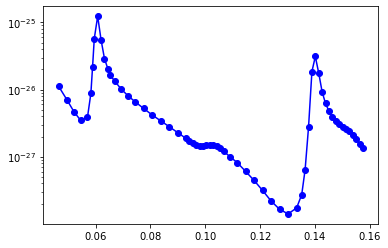

In [11]:
import matplotlib.pyplot as plt

plt.plot(x_1, heat_mass_1,'bo-',label = 'K_num')
plt.yscale('log')
#plt.legend()
plt.show()

In [ ]:
eps1 = re_m[k]**2 - im_m[k]**2
eps2 = 2*re_m[k]*im_m[k]
s.append(abs((3/(eps1 + 1j*eps2 + 2))*np.conj(3/(eps1 + 1j*eps2 + 2))))

In [36]:
import math
import matplotlib.pyplot as plt
import numpy as np
#x_1, real_eps, imag_eps = eps(0.04,0.16,0.006)
#print(heat_mass)
def dW_mass(heat_mass,x,re_m,im_m,n):
    size = 0.5*10**-6#0.001*10**-6 #
    p = size/n
    dW_mass = []
    s = []
    t = len(x)
    cyclic_freq_mass = []
    for k in range(t): 
        C = 299792458
        w_k = [0]*len(x)
        w_k[k] = x[k]/(4.13566*10**-15)
        length = (C/w_k[k])
        #print(re_m[k],im_m[k],"re_m,im_m")
        eps1 = re_m[k]**2 - im_m[k]**2
        eps2 = 2*re_m[k]*im_m[k]
        #h = 1.054571817*10**-34
        h = 6.62607015/(2*math.pi)*10**-34
        #l = ((eps1+1j*eps2-1)/(eps1+1j*eps2+2)).imag
        s.append(abs((3/(eps1 + 1j*eps2 + 2))*np.conj(3/(eps1 + 1j*eps2 + 2))))
        eV = 4.13*10**-15
        cyclic_freq = (2 * math.pi * C)/ length
        cyclic_freq_mass.append(cyclic_freq)
        #print(cyclic_freq*10**-14)
        kb = 1.380649*10**-23
        mu0= 4*math.pi*10**-7
        eps0 = 8.85*10**-12
        w = 4*math.pi*(size/2)**3/(3*360*p**3)
        A = (2*h*(cyclic_freq**5)*(eps2**2)*heat_mass[k]*s[k]*w)/(math.pi*C**4)
        B = (h*cyclic_freq)/kb
        T = 400
        #qwert = 1/(2*math.pi)
        inverted_rad_s = 2*math.pi/(4.135667696*10**(-15)) #123984198392452.12#
        dW = (A*B*math.exp(B/T))/((math.exp(B/T)-1)*T)**2
        dW_mass.append(dW*10**9*inverted_rad_s)
        #print(dW_mass_igt[k],"dW =[nW/K*eV]")
    return dW_mass
re_m = palik_n
im_m =palik_k
x_1 = palik_ev
n = 9
# re_m =[1.616] #palik_n
# im_m =[2.63] #palik_k
# x_1 = [0.13514256] #palik_ev
# x_1 = palik_ev[2::3] # 20 dots
# re_m = palik_n[2::3]
# im_m = palik_k[2::3]
# re_m = palik_n
# im_m = palik_k
# x_1 = palik_ev
#re_m = [palik_n[0],palik_n[1],palik_n[2],palik_n[3],palik_n[4],palik_n[5]]
#im_m = [palik_k[0],palik_k[1],palik_k[2],palik_k[3],palik_k[4],palik_k[5]]
#x_1 = [palik_ev[0],palik_ev[1],palik_ev[1],palik_ev[3],palik_ev[4],palik_ev[5]]
dW_mass_palik = dW_mass(heat_mass_1,x_1,re_m,im_m,n)


In [157]:

print(dW_mass_palik)
print(x_1)
# for i in range(len(palik_ev)):
#     print(palik_ev[i],dW_mass_palik[i])
#0.0015296985453245278

[0.008808949693658476]
[0.13514256]


In [76]:
print(dW_mass_palik)
print(x_1)
0.0000640331700658184 # ADDA(9)
5.8001193385132725e-05 # Mie_theory
5.903364539101059e-05 # ADDA(17)
print("ADDA(17)/ADDA(9)=",5.903364539101059e-05/0.0000640331700658184)
print("ADDA(17)/Mie_theory=",5.903364539101059e-05/5.8001193385132725e-05)
print("ADDA(9)/Mie_theory=",0.0000640331700658184/5.8001193385132725e-05)

[0.05789832801071873]
[0.13514256]
ADDA(17)/ADDA(9)= 0.9219228929370683
ADDA(17)/Mie_theory= 1.0178005303963713
ADDA(9)/Mie_theory= 1.1039974581321603


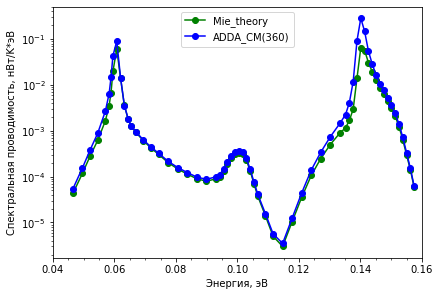

In [38]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, ScalarFormatter
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(1, 1, 1)

# ax.plot(palik_ev, palik_spectrum_5,color='orange',label = 'ADDA_IGT_SO(81)',linestyle='-.')
ax.plot(w_eV_1, conduct_two,"go-",label = 'Mie_theory')
ax.plot(palik_ev, dW_mass_palik,"bo-",label = 'ADDA_СM(360)')
# ax.plot(palik_ev, palik_spectrum_17,'r-',label = 'ADDA_IGT_SO(2553)',linestyle=(0, (5,4 )))
#---------------------------------------------------
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))
ax.set_xlim(0.04, 0.16)
#ax.yaxis.set_major_formatter(formatter)
ax.set_yscale('log')
plt.xlabel("Энергия, эВ")
plt.ylabel("Спектральная проводимость, нВт/K*эВ")
#plt.ylabel("Ошибка, %")
# ax.set_ylabel("Spectral conductance, G(nW/K*eV)")
# ax.set_xlabel("Energy, eV")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.semilogy() 
#ax.grid(which="both", axis="x",)
#ax.tick_params(bottom=True, top=True, left=True, right=True, which = "both")
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.legend(loc=9)
fig.savefig("D:\\graphs\\IGT_so_CM_spheres.png", dpi=1500)

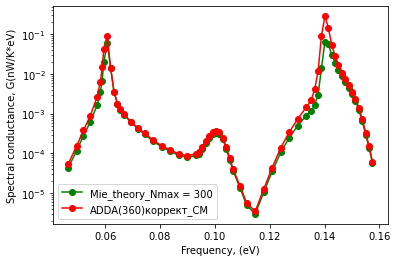

In [37]:
import matplotlib.pyplot as plt
plt.plot(w_eV_1, conduct_two,'go-',label = 'Mie_theory')
plt.plot(x_1, dW_mass_palik,'ro-',label = "ADDA(360)коррект_CM")
#plt.plot(x_1, dW_mass_palik,'ro-',label = "ADDA(81)")
#plt.plot(x_1, dW_mass_palik_2,'bo-',label = "ADDA(125)")
#plt.plot(palik_ev, palik_spectrum_boxes_5,label = 'ADDA_IGTso(125)',color = "green",linestyle='-.')
#plt.plot(w_eV, conduct,'go',label = 'Mie_theory')
plt.yscale('log')
plt.legend()
#plt.title("G(w)_spheres_size=100нм_gap=1мкм")
#plt.title("G(w)_spheres_size=0.5мкм_gap=0.5мкм_29152")
# plt.xlabel("Частота, эВ")
# plt.ylabel("Спектральная проводимость, нВт/K*эВ")
plt.xlabel("Frequency, (eV)")
plt.ylabel("Spectral conductance, G(nW/K*eV)")
#plt.figure(figsize= (20, 20))
plt.yticks()
plt.xticks()
plt.show()

In [167]:
link_palik = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_boxes_3_3_3_2\\spectrum_boxes_3_3_3_dW.txt"
mass = []
for j in range(len(palik_ev)):
    mass.append(str(palik_ev[j])+" "+str(dW_mass_palik[j]))
#print(mass)
def write_file(B,link):
    with open(link, "w") as file:
        for  line in B:
            file.write(line + '\n')
write_file(mass,link_palik)

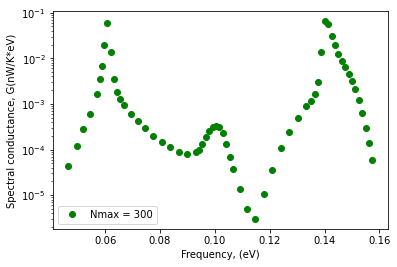

In [14]:
import csv
import matplotlib.pyplot as plt
with open('D:\\Heat_transfer\\1-s2.0-S0022407318309270-mmc1\\mmc1_palik\\SpectralConductance_DGF_R0.25um_D1.um_14252.csv') as file_name:
    file_read = csv.reader(file_name)

    array_two = list(file_read)
t = len(array_two)
array0 = [0] * t
for i in range(t):
    array0[i] = float(array_two[i][0])
array1 = [0] * t
for i in range(t):
    array1[i] = float(array_two[i][1])
array2 = [0] * t
for i in range(t):
    array2[i] = float(array_two[i][2])
array3 = [0] * t
for i in range(t):
    array3[i] = float(array_two[i][3])   
array4 = [0] * t
for i in range(t):
    array4[i] = float(array_two[i][4])  
array5 = [0] * t
for i in range(t):
    array5[i] = float(array_two[i][5]) 
array6 = [0] * t
for i in range(t):
    array6[i] = float(array_two[i][6])
array7 = [0] * t
for i in range(t):
    array7[i] = float(array_two[i][7])
array8 = [0] * t
for i in range(t):
    array8[i] = float(array_two[i][8])
array9 = [0] * t
for i in range(t):
    array9[i] = float(array_two[i][9])
array10 = [0] * t
for i in range(t):
    array10[i] = float(array_two[i][10])
array11 = [0] * t
for i in range(t):
    array11[i] = float(array_two[i][11])
w_eV_1 = []
conduct_two = []
length_m = [0]*len(array0)
#qwert = 1/(2*math.pi)
for k in range(len(array0)): 
    w_eV_1.append(array0[k])
    conduct_two.append(array3[k]*array1[k]*10**9)
#     w_eV.append((299792458/length_m[k])*(4.13566*10**-15))
#     conduct_two.append(array3[k]*12.566370614359172)#12.253718360214055 )
    
#print(w_eV,"eV ")
#w_eV_dot = [0.13514256]
fig1, ax1 = plt.subplots()

#print(conduct_two,"q")
#ax1.plot(w_eV, conduct_two,'go')
#plt.plot(omega_2, dW_t_dda_balls_2014_blu,'bo',label = 'T-DDA(552)')
#plt.plot(x_1, dW_mass_palik,'ro-',label = 'ADDA(389)')
ax1.plot(w_eV_1, conduct_two,'go',label = 'Nmax = 300')
plt.legend()
plt.xlabel("Frequency, (eV)")
plt.ylabel("Spectral conductance, G(nW/K*eV)")
plt.yscale('log')
#plt.figure(figsize= (20, 20))
plt.yticks()
plt.xticks()
plt.show()
# for k in range(len(w_eV_1)):
#     print(w_eV_1[k],conduct_two[k])

In [8]:
def read_file_spectrum(link):
    mass = []
    with open(link, "r") as file1:
        lines = file1.readlines()
    for line in lines:
        mass.append(line.strip())
        #print(line.strip())
    t = len(mass)
    palik_ev = []
    mass_spectrum = []
    array2 = [0] * t 
    for i in range(t):
        array2[i]= mass[i].split(' ')
    for i in range(len(array2)):
        array2[i]= list(map(float, array2[i]))
        palik_ev.append(array2[i][0])
        mass_spectrum.append(array2[i][1])
        #array2[i] = [array2[i][0], array2[i][1], array2[i][2]]
    file1.close
    return palik_ev, mass_spectrum
link_palik_17 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_sphere_17_17_17\\spectrum_sphere_17_17_17_dW.txt"
link_palik_5 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_sphere_5_5_5\\spectrum_sphere_5_5_5_dW.txt"
link_palik_9 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_sphere_9_9_9\\spectrum_sphere_9_9_9_dW.txt"
link_palik_9_K = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_sphere_9_9_9\\spectrum_sphere_9_9_9_K.txt"
palik_ev, palik_spectrum_17 = read_file_spectrum(link_palik_17)
palik_ev, palik_spectrum_5 = read_file_spectrum(link_palik_5)
palik_ev, palik_spectrum_9 = read_file_spectrum(link_palik_9)
palik_ev, palik_spectrum_9_K = read_file_spectrum(link_palik_9_K)

In [78]:
#print(palik_spectrum_9_K)
n = 9 # is the size of cubes along one axis in units of dipoles
size = 0.5#0.5#0.001 #Sets the size of the computational grid along the 𝑥𝑥-axis in µm (§6.2), float
p = size/n
# print(max(palik_spectrum_9_K))
# print(min(palik_spectrum_9_K))
a = 1.2398*10**-6/(max(palik_ev)-min(palik_ev))
print(a)
b = (max(palik_spectrum_9_K)-min(palik_spectrum_9_K))/pow(p*10**-6,6)
print(b)
print(a/b)

1.1172823885727552e-05
8.599366415049074e+18
1.299261288154308e-24


In [14]:
plt.plot(omega_6, dW_t_dda_balls_2014,'bo',label = 'T-DDA(280/552)')
plt.plot(w_eV_1, conduct_two,'go-',label = 'Mie_theory')
plt.plot(palik_ev, palik_spectrum_9,'ro-',label = 'ADDA(389)')

plt.yscale('log')
plt.legend()
#plt.title("G(w)_spheres_size=100нм_gap=1мкм")
#plt.title("G(w)_spheres_size=0.5мкм_gap=0.5мкм_29152")
# plt.xlabel("Частота, [эВ]")
# plt.ylabel("Спектральная проводимость, G [нВт/K*эВ]")
plt.xlabel("Frequency, (eV)")
plt.ylabel("Spectral conductance, G(nW/K*eV)")
#plt.figure(figsize= (20, 20))
plt.yticks()
plt.xticks()
plt.show()

NameError: name 'omega_6' is not defined

C:\Users\Danil169\AppData\Local\Temp\ipykernel_28468\901481903.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(palik_ev, palik_spectrum_9,'b-',label = 'ADDA(389)',linestyle='--')
C:\Users\Danil169\AppData\Local\Temp\ipykernel_28468\901481903.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(palik_ev, palik_spectrum_17,'r-',label = 'ADDA(2553)',linestyle=(0, (5,4 )))


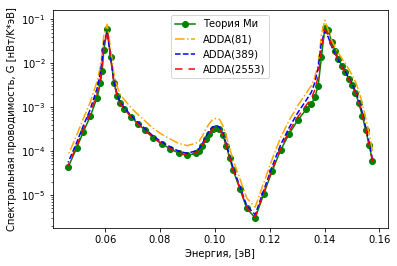

In [16]:
#0.13514256 0.0011603935530721922 # 0.13514256 1.616 2.63
#plt.plot(0.13514256, 0.0011603935530721922,'o',label = 'one_dot')
plt.plot(w_eV_1, conduct_two,'go-',label = 'Теория Ми')
#plt.plot(omega_6, dW_t_dda_balls_2014,'bo',label = 'T-DDA(280/552)')
plt.plot(palik_ev, palik_spectrum_5,color='orange',label = 'ADDA(81)',linestyle='-.')
plt.plot(palik_ev, palik_spectrum_9,'b-',label = 'ADDA(389)',linestyle='--')

plt.plot(palik_ev, palik_spectrum_17,'r-',label = 'ADDA(2553)',linestyle=(0, (5,4 )))

#plt.plot(w_eV, conduct,'go',label = 'Mie_theory')
plt.yscale('log')
plt.legend()
#plt.title("G(w)_spheres_size=100нм_gap=1мкм")
#plt.title("G(w)_spheres_size=0.5мкм_gap=0.5мкм_29152")
plt.xlabel("Энергия, [эВ]")
plt.ylabel("Спектральная проводимость, G [нВт/K*эВ]")
#plt.xlabel("Frequency, (eV)")
#plt.ylabel("Spectral conductance, G(nW/K*eV)")
#plt.figure(figsize= (20, 20))
plt.yticks()
plt.xticks()
plt.show()

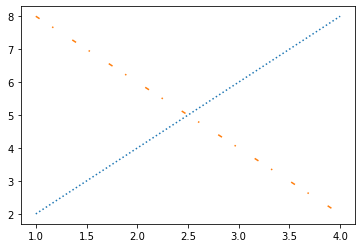

In [90]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]
plt.plot(x, y, linestyle=':') # точечная линия
plt.plot(x, y[::-1], linestyle=(0, (3, 10, 1, 15))) # пунктирная линия с заданным кортежем
plt.show()

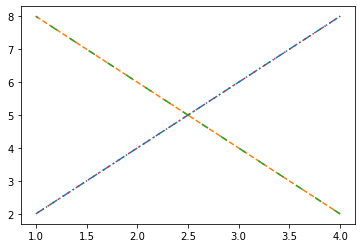

In [91]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]
plt.plot(x, y, linestyle='-.') # точка-тире
plt.plot(x, y[::-1], linestyle='--') # пунктир
plt.plot(x[::-1], y, linestyle=(0, (5, 10))) # пунктир с длиной штриха 5 и пробела 10
plt.plot(x[::-1], y[::-1], linestyle=(0.5, (1, 3))) # пунктир с смещением 0.5 и длиной штриха 1 и пробела 3
plt.show()

In [28]:
for k in range(len(w_eV_1)):
    print(palik_ev[k],palik_spectrum_boxes_9[k])

0.15745968 0.00036899435676144253
0.15621984 0.0010075119794600935
0.15498 0.0024323111210029667
0.15374016 0.005629696007838004
0.15250032 0.01043097029860169
0.15126048 0.01478133753800387
0.15002064 0.018622363426452727
0.1487808 0.022717720732965335
0.14754096 0.02660582589713771
0.14630112 0.03062779587185988
0.14506128 0.03598039460477779
0.14382144 0.04298056696066487
0.1425816 0.05295556010949397
0.14134176 0.07498339501957549
0.14010192 0.13341120241212454
0.13886208 0.22212477920097912
0.13762224 0.07664813765817985
0.1363824 0.024247093261676997
0.13514256 0.01237728311752009
0.1332828 0.007459526973683984
0.1301832 0.0036377089943677283
0.1270836 0.0016174527811117503
0.123984 0.0006425591454100599
0.1208844 0.00019967029864585635
0.1177848 5.561902985948498e-05
0.1146852 1.5251078794697824e-05
0.1115856 2.423796839089396e-05
0.10910592 6.580043954380728e-05
0.10662624 0.0001724907755293452
0.10538639999999999 0.00031600911646646333
0.10414656 0.0006023874630199308
0.102906

In [176]:
link_palik_boxes_9 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_boxes_9_9_9\\spectrum_boxes_9_9_9_dW.txt"
palik_ev, palik_spectrum_boxes_9 = read_file_spectrum(link_palik_boxes_9)
#print(palik_spectrum_boxes_9)
link_palik_boxes_5 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_boxes_5_5_5\\spectrum_boxes_5_5_5_dW.txt"
palik_ev, palik_spectrum_boxes_5 = read_file_spectrum(link_palik_boxes_5)
# link_palik_boxes_3 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_boxes_3_3_3\\spectrum_boxes_3_3_3_dW.txt"
# palik_ev, palik_spectrum_boxes_3 = read_file_spectrum(link_palik_boxes_3)
link_palik_boxes_3 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_boxes_3_3_3_2\\spectrum_boxes_3_3_3_dW.txt"
palik_ev, palik_spectrum_boxes_3 = read_file_spectrum(link_palik_boxes_3)
link_palik_boxes_1 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_dipoles\\spectrum_dipoles_dW.txt"
palik_ev, palik_spectrum_boxes_1 = read_file_spectrum(link_palik_boxes_1)

In [ ]:
def plot_create():
    fig = plt.figure(constrained_layout=True)
    ax = fig.add_subplot(1, 1, 1)
    #ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0,0))
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlabel("Energy, eV")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which="both", axis="x", linestyle="dotted", zorder=0)
    ax.tick_params(bottom=True, top=True, left=True, right=True, which = "both")
    ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
    plot_setrcparams()
    return fig, ax

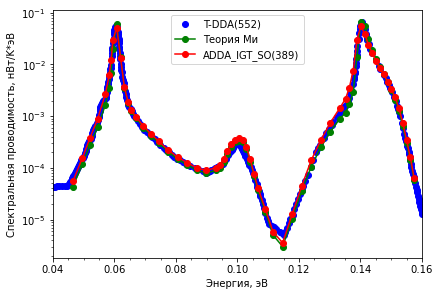

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, ScalarFormatter
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(1, 1, 1)
# ax.plot(omega_5, dW_t_dda_boxes_2014,'bo',label = 'T-DDA(216)')
# ax.plot(palik_ev, palik_spectrum_boxes_5,'o-',label = 'ADDA(125)',color = "green")
# ax.plot(palik_ev, palik_spectrum_boxes_9,'ro-',label = 'ADDA(729)')
#----------------------
#ax.plot(palik_ev,error,color='orange')
plt.plot(omega_6, dW_t_dda_balls_2014,'bo',label = 'T-DDA(552)')
ax.plot(palik_ev, conduct_two,'go-',label = 'Теория Ми')

# ax.plot(palik_ev, palik_spectrum_5,color='orange',label = 'ADDA_IGT_SO(81)',linestyle='-.')
ax.plot(palik_ev, palik_spectrum_9,"ro-",label = 'ADDA_IGT_SO(389)')

# ax.plot(palik_ev, palik_spectrum_17,'r-',label = 'ADDA_IGT_SO(2553)',linestyle=(0, (5,4 )))
#---------------------------------------------------
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))
ax.set_xlim(0.04, 0.16)
#ax.yaxis.set_major_formatter(formatter)
ax.set_yscale('log')
plt.xlabel("Энергия, эВ")
plt.ylabel("Спектральная проводимость, нВт/K*эВ")
#plt.ylabel("Ошибка, %")
# ax.set_ylabel("Spectral conductance, G(nW/K*eV)")
# ax.set_xlabel("Energy, eV")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.semilogy() 
#ax.grid(which="both", axis="x",)
#ax.tick_params(bottom=True, top=True, left=True, right=True, which = "both")
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.legend(loc=9)
fig.savefig("D:\\graphs\\balls_t-dda.png", dpi=1500)

In [26]:
# error = []
# for k in range(len(palik_ev)):
#     error.append(abs(palik_spectrum_17[k]-conduct_two[k])*100/conduct_two[k])
# plt.plot(palik_ev,error,color='orange',label = 'error')
# for k in range(len(palik_ev)):
#     print(palik_ev[k],error[k])

C:\Users\Danil169\AppData\Local\Temp\ipykernel_21128\2992204106.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(palik_ev, palik_spectrum_9,'b-',label = 'ADDA_IGTso(389)',linestyle='--')
C:\Users\Danil169\AppData\Local\Temp\ipykernel_21128\2992204106.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(palik_ev, palik_spectrum_17,'r-',label = 'ADDA_IGTso(2553)',linestyle=(0, (5,4 )))


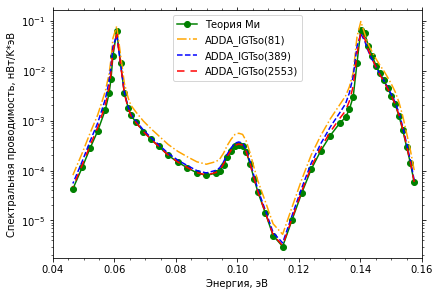

In [182]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, ScalarFormatter
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(1, 1, 1)
#----------------------
ax.plot(w_eV_1, conduct_two,'go-',label = 'Теория Ми')
ax.plot(palik_ev, palik_spectrum_5,color='orange',label = 'ADDA_IGTso(81)',linestyle='-.')
ax.plot(palik_ev, palik_spectrum_9,'b-',label = 'ADDA_IGTso(389)',linestyle='--')
ax.plot(palik_ev, palik_spectrum_17,'r-',label = 'ADDA_IGTso(2553)',linestyle=(0, (5,4 )))
#----------------------------------
# ax.plot(palik_ev, palik_spectrum_boxes_1,label = 'ADDA_IGTso(1)',color = "b",linestyle='-')
# ax.plot(palik_ev, palik_spectrum_boxes_3,label = 'ADDA_IGTso(27)',color = "orange",linestyle='--')
# ax.plot(palik_ev, palik_spectrum_boxes_5,label = 'ADDA_IGTso(125)',color = "green",linestyle='-.')
# ax.plot(palik_ev, palik_spectrum_boxes_9,'r',label = 'ADDA_IGTso(729)',linestyle=(0, (5,4 )))
#---------------------------------------------------
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))
ax.set_xlim(0.04, 0.16)
ax.yaxis.set_major_formatter(formatter)
ax.set_yscale('log')
plt.xlabel("Энергия, эВ")
plt.ylabel("Спектральная проводимость, нВт/K*эВ")
# ax.set_ylabel("Spectral conductance, G(nW/K*eV)")
# ax.set_xlabel("Energy, eV")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.semilogy() 
#ax.grid(which="both", axis="x",)
ax.tick_params(bottom=True, top=True, left=True, right=True, which = "both")
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
#plot_setrcparams()
ax.legend(loc=9)
fig.savefig("D:\\graphs\\adda_igt_so.png", dpi=1500)

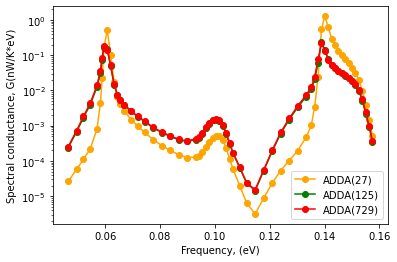

In [32]:
#plt.plot(omega_4, dW_t_dda_boxes_2017,'go',label = 'T-DDA(125/729)_2017')
#plt.plot(omega_5, dW_t_dda_boxes_2014,'bo',label = 'T-DDA(64/216)')
import matplotlib.pyplot as plt
plt.plot(palik_ev, palik_spectrum_boxes_3,'o-',label = 'ADDA(27)',color = "orange")
plt.plot(palik_ev, palik_spectrum_boxes_5,'o-',label = 'ADDA(125)',color = "green")
plt.plot(palik_ev, palik_spectrum_boxes_9,'ro-',label = 'ADDA(729)')
#plt.plot(omega_6, dW_t_dda_1_2014,'bo',label = 'dW')

plt.yscale('log')
plt.legend()
#plt.title("G(w)_spheres_size=100нм_gap=1мкм")
#plt.title("G(w)_spheres_size=0.5мкм_gap=0.5мкм_29152")
#plt.xlabel("Частота, [эВ]")
#plt.ylabel("Спектральная проводимость, G [нВт/K*эВ]")
plt.xlabel("Frequency, (eV)")
plt.ylabel("Spectral conductance, G(nW/K*eV)")
#plt.figure(figsize= (20, 20))
plt.yticks()
plt.xticks()
plt.show()

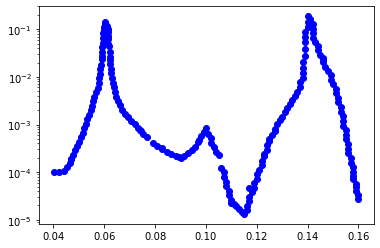

In [30]:
import matplotlib.pyplot as plt
# импорт данных T-DDA из статьи 2014
def right_in_file_shape(path):
    with open(path,"r") as ins:
        array1 = []
        for line in ins:
            array1.append(line)
    t = len(array1)
    array2 = [0] * t 
    for i in range(t):
        array2[i]= array1[i].split('\t')
        #array2.append(array1[i].split('\t','\n'))
    #print(array2)
    #print(array2[0])
    for i in range(len(array2)):
        array2[i]= list(map(float, array2[i]))
        array2[i] = [array2[i][0], array2[i][1]]
    return array2
path_t_dda_boxes = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\exl\\boxes_2017.txt"
path_t_dda_boxes_2014 = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\exl\\boxes_2014.txt"
path_t_dda_6= "D:\\Heat_transfer\\T-DDA_1.txt"#"D:\\adda1_4_0\\adda-1.4.0\\win64_1\\spektr\\Оцифровка_шаров_2014.txt"
array5 = right_in_file_shape(path_t_dda_boxes_2014)
array4 = right_in_file_shape(path_t_dda_boxes)
array6  = right_in_file_shape(path_t_dda_6)
dW_t_dda_boxes_2017 = []
omega_4 = []
dW_t_dda_boxes_2014 = []
dW_t_dda_1_2014 = []
omega_6 = []
omega_5 = []
for i in range(len(array4)):
    omega_4.append(array4[i][0])
    dW_t_dda_boxes_2017.append(array4[i][1])
for i in range(len(array5)):
    omega_5.append(array5[i][0])
    dW_t_dda_boxes_2014.append(array5[i][1])
for i in range(len(array6)):
    omega_6.append(array6[i][0])
    dW_t_dda_1_2014.append(array6[i][1])
fig3, ax3 = plt.subplots()
#ax3.plot(omega_1, dW_t_dda_balls_2014,'bo',label = 'dW')
#ax3.plot(omega_1, dW_t_dda_balls_2014,'go',label = 'dW')
#ax3.plot(omega_2, dW_t_dda_balls_2014_blu,'bo',label = 'dW')
# ax3.plot(omega_4, dW_t_dda_boxes_2017,'go',label = 'dW')
# ax3.plot(omega_5, dW_t_dda_boxes_2014,'bo',label = 'dW')
ax3.plot(omega_6, dW_t_dda_1_2014,'bo',label = 'dW')
plt.yscale('log')
plt.show()

In [57]:
link_palik_spheres_9_average_with = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_average_spheres_9_9_9\\spectrum_average_spheres_9_9_9_dW.txt"
palik_ev, palik_spectrum_spheres_9_averag_with = read_file_spectrum(link_palik_spheres_9_average_with)
link_palik_spheres_9_average_without = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_average_spheres_9_9_9\\spectrum_average_spheres_9_9_9_dW_without.txt"
palik_ev, palik_spectrum_spheres_9_averag_without = read_file_spectrum(link_palik_spheres_9_average_without)
link_palik_spheres_11_average_with = "D:\\adda1_4_0\\adda-1.4.0\\win64_1\\Archive (1)\\spectrum_average_spheres_11_11_11\\spectrum_average_spheres_11_11_11_dW_with.txt"
palik_ev, palik_spectrum_spheres_11_averag_with = read_file_spectrum(link_palik_spheres_11_average_with)

C:\Users\Danil169\AppData\Local\Temp\ipykernel_9696\2264188853.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(palik_ev, palik_spectrum_spheres_9_averag_with,'b-',label = 'ADDA_CM_cor(360)',linestyle='--')
C:\Users\Danil169\AppData\Local\Temp\ipykernel_9696\2264188853.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(palik_ev, palik_spectrum_spheres_9_averag_without,'r-',label = 'ADDA_CM(360)',linestyle=(0, (5,4 )))


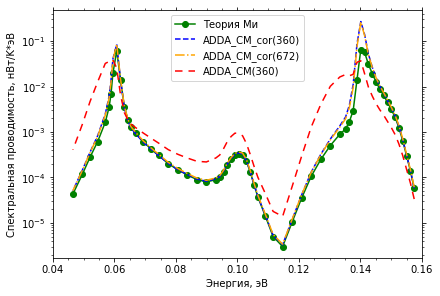

In [58]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, ScalarFormatter
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(1, 1, 1)
#----------------------
ax.plot(w_eV_1, conduct_two,'go-',label = 'Теория Ми')
#plt.plot(omega_6, dW_t_dda_balls_2014,'bo',label = 'T-DDA(280/552)')
#ax.plot(palik_ev, palik_spectrum_5,color='orange',label = 'ADDA(81)',linestyle='-.')
ax.plot(palik_ev, palik_spectrum_spheres_9_averag_with,'b-',label = 'ADDA_CM_cor(360)',linestyle='--')
ax.plot(palik_ev, palik_spectrum_spheres_11_averag_with,color='orange',label = 'ADDA_CM_cor(672)',linestyle='-.')
ax.plot(palik_ev, palik_spectrum_spheres_9_averag_without,'r-',label = 'ADDA_CM(360)',linestyle=(0, (5,4 )))
#---------------------------------------------------
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0,0))
ax.set_xlim(0.04, 0.16)
ax.yaxis.set_major_formatter(formatter)
ax.set_yscale('log')
plt.xlabel("Энергия, эВ")
plt.ylabel("Спектральная проводимость, нВт/K*эВ")
# ax.set_ylabel("Spectral conductance, G(nW/K*eV)")
# ax.set_xlabel("Energy, eV")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.semilogy() 
#ax.grid(which="both", axis="x",)
ax.tick_params(bottom=True, top=True, left=True, right=True, which = "both")
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
#plot_setrcparams()
ax.legend(loc=9)
fig.savefig("D:\\graphs\\Mie_adda_cm.png", dpi=1500)